Step Three --- Analysis and Visualization

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
os.makedirs('D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\figures', exist_ok = True)
data = pd.read_csv('D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\data\\cycling_clean.csv')

In [16]:
data.describe(include = 'all')

,all_riders,rider_class,stage,points,stage_class
count,3496,3496,3496,3496.000000,3496
unique,184,4,19,NaN,3
top,Tadej Pogačar,Unclassed,X1,NaN,Hills
freq,19,2185,184,NaN,1472
mean,NaN,NaN,NaN,12.385297,NaN
std,NaN,NaN,NaN,36.285334,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,8.000000,NaN


In [17]:
data['rider_class'].value_counts()

rider_class
Unclassed      2185
Sprinter        551
Climber         437
All Rounder     323
Name: count, dtype: int64

In [18]:
data['stage_class'].value_counts()

stage_class
Hills    1472
Flat     1104
Mount     920
Name: count, dtype: int64

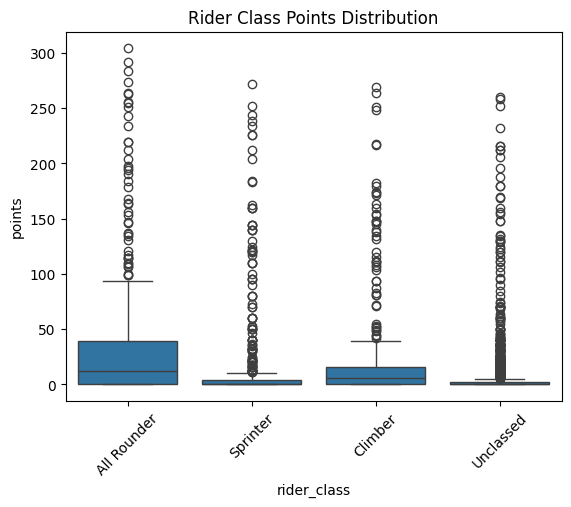

In [19]:
# Box plot for rider_class

sns.boxplot(data = data, x = 'rider_class', y = 'points')
plt.title("Rider Class Points Distribution")
plt.xticks(rotation = 45)
plt.savefig('D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\figures\\boxplot_for_rider_class.png', bbox_inches = 'tight')

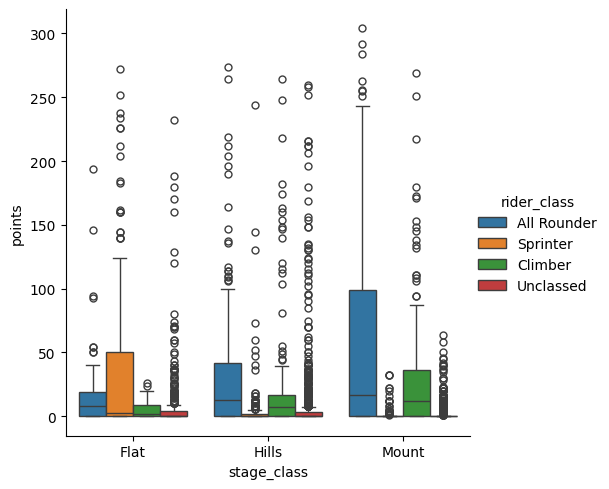

In [20]:
sns.catplot(data = data, x = 'stage_class', y = 'points', hue = 'rider_class', kind = 'box')
plt.savefig('D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\figures\\boxplot_stage_class.png', bbox_inches = 'tight')

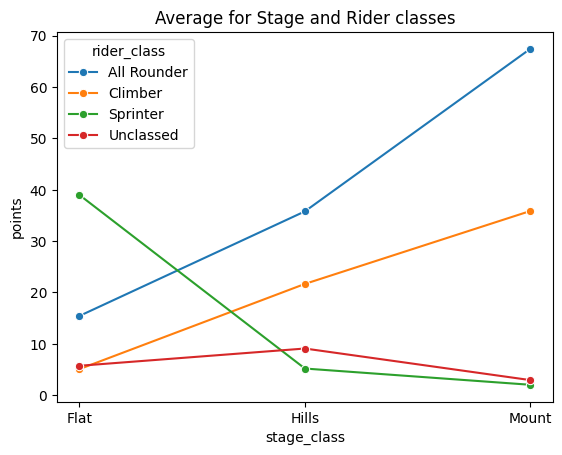

In [21]:
m_data = data.groupby(['stage_class', 'rider_class'])['points'].mean().reset_index()
sns.lineplot(data =  m_data, x = 'stage_class', y = 'points', hue = 'rider_class', marker = 'o')
plt.title('Average for Stage and Rider classes')
plt.savefig('D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\figures\\interaction_plot_stage_and_rider.png', bbox_inches = 'tight')

Step Four --- Model Implementation

In [22]:
# implementing mixed effects model

import statsmodels.formula.api as smf

data['rider_id'] = data.groupby('rider_class').cumcount() +1


In [23]:
mix = smf.mixedlm("points ~ C(rider_class)*C(stage_class)", data = data, groups = data['rider_id'])
result = mix.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Mixed Linear Model Regression Results
===================================================================================================
Model:                          MixedLM               Dependent Variable:               points     
No. Observations:               3496                  Method:                           REML       
No. Groups:                     2185                  Scale:                            1106.5224  
Min. group size:                1                     Log-Likelihood:                   -17221.9980
Max. group size:                4                     Converged:                        Yes        
Mean group size:                1.6                                                                
---------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    z    P>|z|  [0.025   0.975]
---------------------------------------------------------------------------------------------------
Intercept                                            15.157    3.333   4.548 0.000    8.625  21.689
C(rider_class)[T.Climber]                           -10.155    4.352  -2.334 0.020  -18.685  -1.626
C(rider_class)[T.Sprinter]                           23.786    4.162   5.715 0.000   15.629  31.944
C(rider_class)[T.Unclassed]                          -9.416    3.560  -2.645 0.008  -16.394  -2.438
C(stage_class)[T.Hills]                              20.424    4.403   4.639 0.000   11.795  29.053
C(stage_class)[T.Mount]                              52.040    4.936  10.542 0.000   42.366  61.715
C(rider_class)[T.Climber]:C(stage_class)[T.Hills]    -3.843    5.755  -0.668 0.504  -15.122   7.437
C(rider_class)[T.Sprinter]:C(stage_class)[T.Hills]  -54.217    5.502  -9.853 0.000  -65.002 -43.432
C(rider_class)[T.Unclassed]:C(stage_class)[T.Hills] -17.068    4.704  -3.628 0.000  -26.288  -7.847
C(rider_class)[T.Climber]:C(stage_class)[T.Mount]   -21.193    6.452  -3.284 0.001  -33.839  -8.546
C(rider_class)[T.Sprinter]:C(stage_class)[T.Mount]  -88.936    6.169 -14.416 0.000 -101.027 -76.845
C(rider_class)[T.Unclassed]:C(stage_class)[T.Mount] -54.830    5.274 -10.396 0.000  -65.167 -44.492
Group Var                                            23.892    0.475                               
===================================================================================================

"""

In [24]:
# Results

summ = data.groupby(['rider_class', 'stage_class'])['points'].agg(['mean','median','std','count']).reset_index()
summ .to_csv('D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\analysis\\summary_tab.csv', index = False)

In [25]:
# Saving the model

import joblib
joblib.dump(result,'D:\\Cycling Performance Analysis\\Cycling_Report\\Cycling_Report\\analysis\\mix_model.pkl')
print("Model Saved as 'mix_model.pkl'")

Model Saved as 'mix_model.pkl'
